In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
pwd

'C:\\Users\\hp\\Data Science Python'

In [3]:
df = pd.read_csv('GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.iloc[:, 0:2]
df.head()


,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [5]:
df.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


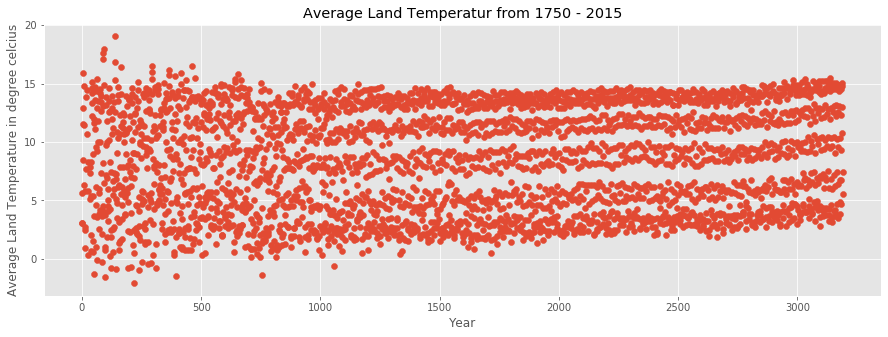

In [6]:
plt.figure(figsize = (15, 5))
plt.scatter(x = df['LandAverageTemperature'].index, y = df['LandAverageTemperature'])
plt.title('Average Land Temperatur from 1750 - 2015')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature in degree celcius')
plt.show()

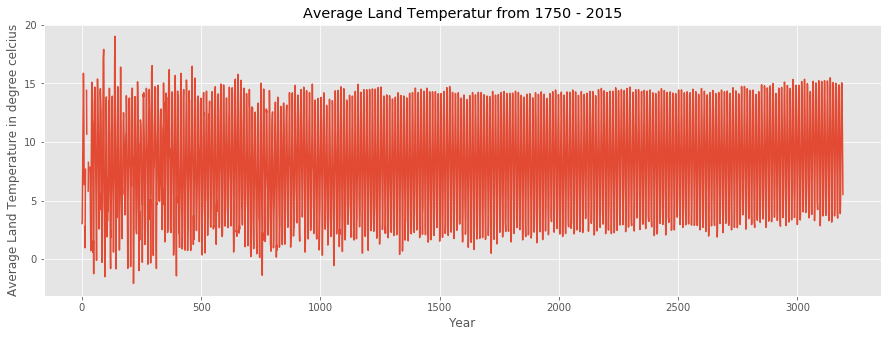

In [7]:
plt.figure(figsize = (15, 5))
plt.plot(df['LandAverageTemperature'])
plt.title('Average Land Temperatur from 1750 - 2015')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature in degree celcius')
plt.show()

In [8]:
print(type(df['dt'][0]))

<class 'str'>


In [9]:
times = pd.DatetimeIndex(df['dt'])
grouped = df.groupby([times.year]).mean()

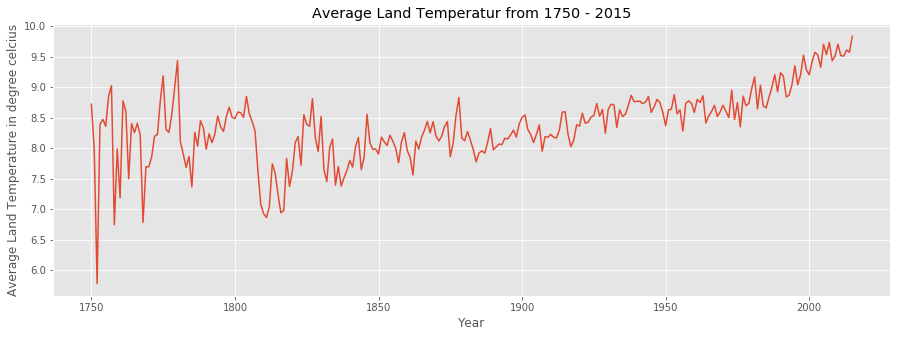

In [10]:
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

plt.title('Average Land Temperatur from 1750 - 2015')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature in degree celcius')
plt.show()

In [11]:
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [12]:
df[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [13]:
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [14]:
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(method='ffill')

In [15]:
df[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,0.348
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,8.265
29,1752-06-01,8.265
30,1752-07-01,8.265
31,1752-08-01,8.265
32,1752-09-01,8.265
33,1752-10-01,7.839


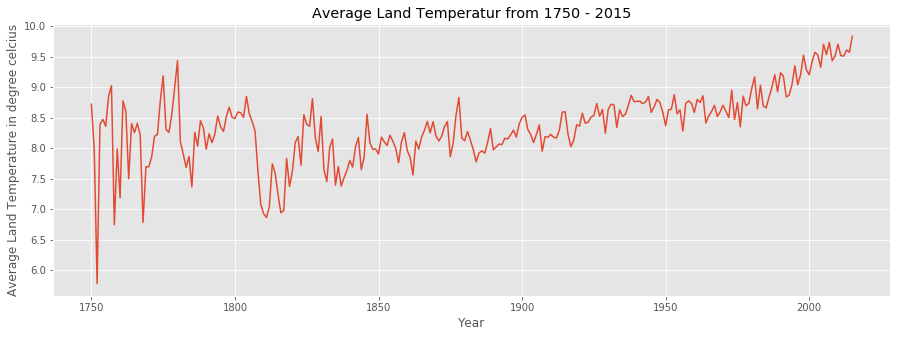

In [16]:
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

plt.title('Average Land Temperatur from 1750 - 2015')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature in degree celcius')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression as LinReg

In [18]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

In [19]:
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
print('Accurracy: ' + str(reg.score(x,y)))

Accurracy: 0.3873026972956114


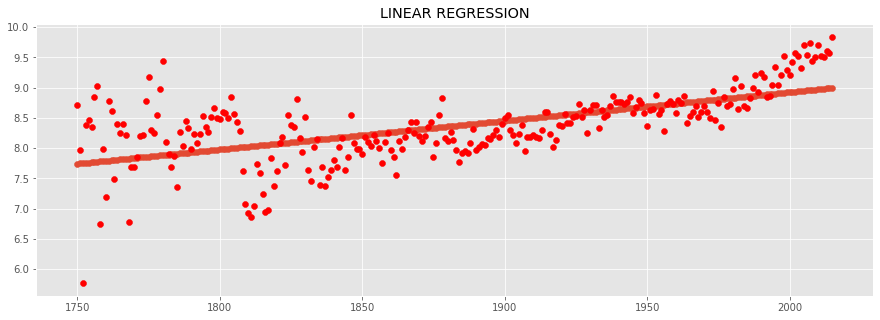

In [20]:
plt.figure(figsize = (15, 5))
plt.title('LINEAR REGRESSION')
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = 'r')
plt.show()

In [21]:
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
print('Accuracy: ' + str(reg.score(x,y)))


Accuracy: 0.3873026972956114


In [23]:
reg = LinReg()
reg.predict(2050)